In [25]:
import pandas as pd

# Load your dataset
df = pd.read_excel(r"C:\Users\sdkag\OneDrive\Documents\Research Project Dataset(AutoRecovered).xlsx",sheet_name='Sheet2')  # Replace with your file path
df['month'] = pd.to_datetime(df['month'])
df

,month,Arrival(in ton),modal price,temprature,Rain Days,rainfall
0,2010-01-01,18.108688,952.799068,33.333333,2,1.94
1,2010-02-01,19.938417,937.459645,38.333333,0,0.00
2,2010-03-01,24.788689,949.015482,40.555556,3,0.52
3,2010-04-01,24.663240,1008.844008,40.555556,2,44.99
4,2010-05-01,14.229670,1017.568627,38.333333,4,3.66
...,...,...,...,...,...,...
172,2024-05-01,21.294051,2537.236682,25.000000,1,47.08
173,2024-06-01,16.947092,2473.844760,25.000000,20,95.33
174,2024-07-01,13.303412,2480.717893,23.888889,32,53.53
175,2024-08-01,13.501367,2461.471763,23.888889,29,19.02


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit linear model
X = sm.add_constant(df['month'])  # Add constant for intercept
model = sm.OLS(df['modal price'], X).fit()
df['fit'] = model.predict(X)

# Forecast for the next year
next_year = np.array([[1, 2025]])  # Intercept + Year
forecast = model.predict(next_year)[0]

# Plot data
plt.figure(figsize=(8, 5))
plt.plot(df['month'], df['modal price'], linestyle='-', marker='o', color='blue', label='Actual')
plt.plot(df['month'], df['fit'], linestyle='--', color='brown', label='Fit')
plt.scatter([2025], [forecast], color='green', label='Forecast')

# Labels and Title
plt.xlabel('month')
plt.ylabel('modal price')
plt.title('Trend Analysis Plot for Rainfall\nLinear Trend Model\n$Y_t = {:.2f} + {:.3f}t$'.format(model.params[0], model.params[1]))
plt.legend()

# Show plot
plt.show()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [2]:
df.month = pd.to_datetime(df.month)
df = df.set_index("month")
df.head()

,Arrival(in ton),modal price,temprature,Rain Days,rainfall
month,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94
2010-02-01,19.938417,937.459645,38.333333,0,0.00
2010-03-01,24.788689,949.015482,40.555556,3,0.52
2010-04-01,24.663240,1008.844008,40.555556,2,44.99
2010-05-01,14.229670,1017.568627,38.333333,4,3.66


In [3]:
df.index = pd.to_datetime(df.index)


df['month'] = df.index.month
df['year'] = df.index.year


df.head()  

,Arrival(in ton),modal price,temprature,Rain Days,rainfall,month,year
month,,,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94,1,2010
2010-02-01,19.938417,937.459645,38.333333,0,0.00,2,2010
2010-03-01,24.788689,949.015482,40.555556,3,0.52,3,2010
2010-04-01,24.663240,1008.844008,40.555556,2,44.99,4,2010
2010-05-01,14.229670,1017.568627,38.333333,4,3.66,5,2010


In [4]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'


df['season'] = df['month'].apply(month_to_season)


df = df.drop(columns=['month'])


In [5]:
season_dummies = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df, season_dummies], axis=1)

df.head()

,Arrival(in ton),modal price,temprature,Rain Days,rainfall,year,season,season_Autumn,season_Spring,season_Summer,season_Winter
month,,,,,,,,,,,
2010-01-01,18.108688,952.799068,33.333333,2,1.94,2010,Winter,False,False,False,True
2010-02-01,19.938417,937.459645,38.333333,0,0.00,2010,Winter,False,False,False,True
2010-03-01,24.788689,949.015482,40.555556,3,0.52,2010,Spring,False,True,False,False
2010-04-01,24.663240,1008.844008,40.555556,2,44.99,2010,Spring,False,True,False,False
2010-05-01,14.229670,1017.568627,38.333333,4,3.66,2010,Spring,False,True,False,False


In [6]:
df.columns

Index(['Arrival(in ton)', 'modal price', 'temprature', 'Rain Days', 'rainfall',
       'year', 'season', 'season_Autumn', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [7]:
# Create lagged features for price
df['lagged_modal_price'] = df['modal price'].shift(1)

In [8]:
from sklearn.model_selection import train_test_split 
# Define features (X) and target (y) using the DataFrame columns
X = df[['rainfall', 'Rain Days','lagged_modal_price','temprature'] + list(season_dummies.columns)]
y = df['modal price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# First XGBoost model for Pima Indians dataset
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import pandas as pd
import numpy as np


In [10]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',   # suitable for regression
    n_estimators=100,               # number of trees, tune as needed
    learning_rate=0.1,              # learning rate
    max_depth=4,                    # maximum depth of each tree
    subsample=0.2,                  # subsampling ratio for training
    colsample_bytree=0.2,           # subsampling ratio for columns
    random_state=42)

In [11]:
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)


In [12]:
train_mape = mean_absolute_percentage_error(y_train, y_pred_train) * 100
test_mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100
test_mse = mean_squared_error(y_test, y_pred_test)


In [13]:
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")
print(f"Test MSE: {test_mse:.4f}")


Train MAPE: 9.78%
Test MAPE: 10.02%
Test MSE: 60488.8174


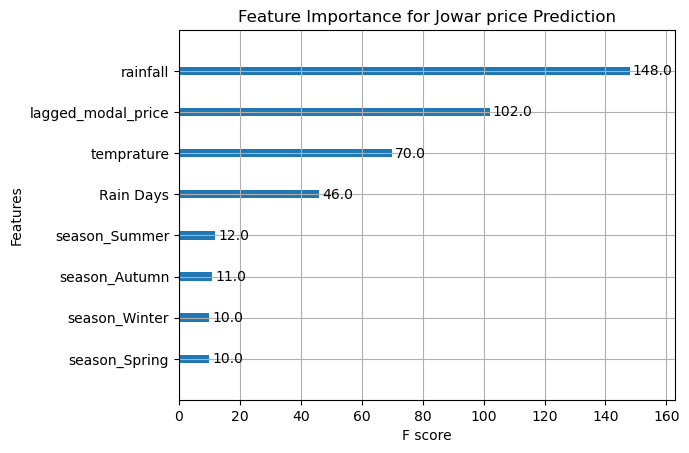

In [14]:
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, importance_type="weight")
plt.title("Feature Importance for Jowar price Prediction")
plt.show()

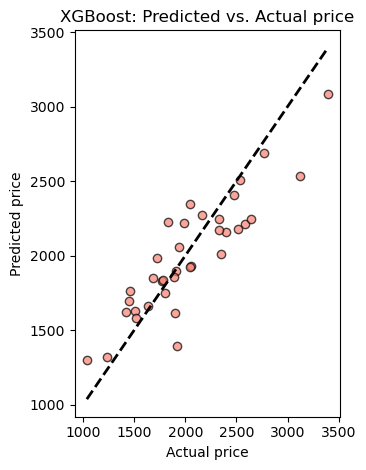

In [15]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color="salmon", edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect prediction
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("XGBoost: Predicted vs. Actual price")

plt.tight_layout()
plt.show()

In [16]:
forecast_horizon = 12  # Define the number of future periods you want to forecast
last_known_data = X_test.iloc[-forecast_horizon:].copy()  # Use last available test set data as baseline
forecasted_values = xgb_model.predict(last_known_data)

In [17]:
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
test_results = test_results.sort_index() 

In [18]:
forecast_start_date = test_results.index[-1] + pd.DateOffset(1)  # Start one period after the last test set index
forecast_index = pd.date_range(start=forecast_start_date, periods=forecast_horizon, freq='M')  # Monthly frequency

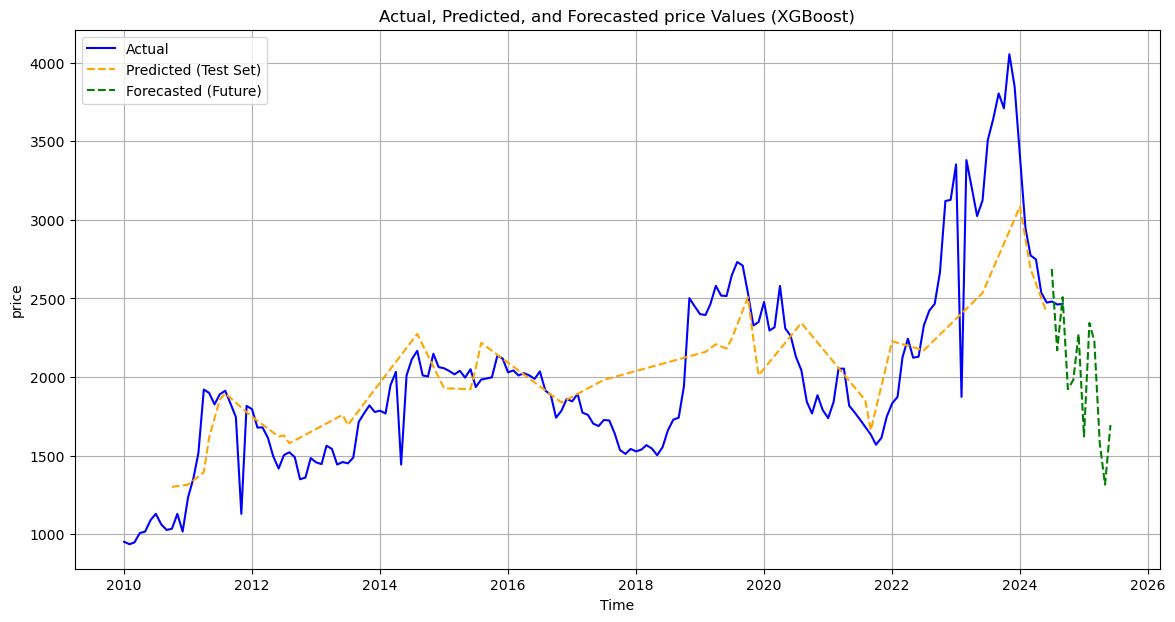

In [19]:
forecast_df = pd.DataFrame({'Forecasted': forecasted_values}, index=forecast_index)

# Plotting
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(df.index, y, label='Actual', color='blue')

# Plot predicted values on the test set
plt.plot(test_results.index, test_results['Predicted'], label='Predicted (Test Set)', color='orange', linestyle='--')

# Plot forecasted values with a dashed line for distinction
plt.plot(forecast_df.index, forecast_df['Forecasted'], label='Forecasted (Future)', color='green', linestyle='--')

# Customize plot
plt.xlabel('Time')
plt.ylabel('price')
plt.title('Actual, Predicted, and Forecasted price Values (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
import pickle
import xgboost as xgb

# Train your XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Save the model
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [21]:
!pip install Flask


Note: you may need to restart the kernel to use updated packages.


In [23]:
from flask import Flask, jsonify, request
import pickle
import numpy as np
import xgboost as xgb
from tensorflow.keras.models import load_model
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

app = Flask(__name__)


with open('xgboost_model.pkl', 'rb') as f:
    xgboost_model = pickle.load(f)

# ARIMA Prediction Endpoint

# XGBoost Prediction Endpoint
@app.route('/predict_xgboost', methods=['POST'])
def predict_xgboost():
    data = request.get_json(force=True)
    features = np.array(data['features']).reshape(1, -1)  # Ensure features are in correct shape
    
    # Predict using XGBoost model
    prediction = xgboost_model.predict(features)[0]
    
    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\sdkag\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
